# Avaliação Final

NOME: Felipe Maluli de Carvalho Dias


E-MAIL: felipemcd1@al.insper.edu.br
femcdias@gmail.com

Esta é a A.F. de Álgebra Linear e Teoria da Informação de 2s2023.

INSTRUÇÕES:

1. Faça todas as questões
1. Salve o notebook
1. Envie o notebook salvo no Blackboard

IMPORTANTE:

* Você pode consultar qualquer material, mas não qualquer colega ou pessoa humana, presente ou não na prova.
* Não é permitida a utilização de geradores de texto, como o GPT-3. É permitida somente a utilização do copilot.
* O envio da prova será fechado às 11h45. Aqueles que não enviarem o material até este horário ficarão com zero.
* A prova vale um total de 10 pontos. Cada questão vale 2.5 pontos.
* Os conceitos F, E, D, C, B, A serão mapeados para 0, 2, 4, 6, 8 e 10.
* Para todas as questões, usaremos a rubrica que segue anexa a esta prova. Há uma rubrica para a justificativa e uma rubrica para o código. A nota da questão é a menor entre as notas da justificativa e do código.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Exercício 1

A matriz $X$ é:

$$
X = \begin{bmatrix} 0.95 & -0.75 \\ 0.252 & -0.05 \end{bmatrix}
$$

Um auto-vetor de X é:
$$
v = \begin{bmatrix} 3 \\ 1 \end{bmatrix}
$$

Quais dentre os valores abaixo seriam auto-valores de $X$ em par com o auto-vetor $v$? Justifique sua resposta.

[ ] 0.2

[ ] 0.31

[ X ] 0.7

[ ] 0.7071

[ ] 0.94

[ ] 1

[ ] 2.1

[ ] 3

In [18]:
X = np.array([[0.95, -0.75], [0.25, -0.05]])
eigenvalues, eigenvectors = np.linalg.eig(X)
print(eigenvectors)
print(eigenvalues)

[[0.9486833  0.70710678]
 [0.31622777 0.70710678]]
[0.7 0.2]


In [19]:
AvezesV = X @ np.array([[3],[1]])
AvezesV

array([[2.1],
       [0.7]])

In [21]:
print(np.array([[3],[1]]) * 0.7)
print(np.array([[3],[1]]) * 0.2)

[[2.1]
 [0.7]]
[[0.6]
 [0.2]]


Dado a equação $Xv = v\lambda$, como $Xv = \begin{bmatrix} 2.1 \\ 0.7 \end{bmatrix}$ e $v\lambda = \begin{bmatrix} 3\lambda \\ \lambda \end{bmatrix}$, o único autovalor que satisfaz a equação é $\lambda = 0.7$.

# Exercício 2

Você foi designado para realizar a importante tarefa de analisar um conjunto de dados contendo informações de uma famosa série animada japonesa. Por ser um expecialista em Álgebra Linear, você decidiu aplicar a projeção PCA para reduzir a dimensionalidade dos dados. Assim, utilize o conjunto de dados fornecido com a prova (retirado [daqui](https://www.kaggle.com/datasets/dinishsubaramaniam/op-episodes-and-arcs/)), aplique a projeção PCA nele e decida qual o número de dimensões que você usaria para representar os dados. Justifique sua resposta.

In [23]:
from sklearn.decomposition import PCA
import pandas as pd

df = pd.read_csv('one piece arcs.csv').select_dtypes(['number'])
numeric_columns = df.to_numpy()

In [24]:
df.head()

,Arc Type,Total Chapters,Manga Percentage,Total Episodes,Total Minutes,Anime Percentage
0,0,7,0.0067,3,72,0.0028
1,0,14,0.0133,5,120,0.0046
2,0,20,0.0191,10,240,0.0093
3,0,27,0.0257,12,288,0.0112
4,0,27,0.0257,14,360,0.0130


In [46]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
Y = pca.fit_transform(numeric_columns)
pca2 = PCA(n_components=2)
Y2 = pca2.fit_transform(numeric_columns)
pca3 = PCA(n_components=3)
Y3 = pca3.fit_transform(numeric_columns)

# checking what cumulative explained variance ratio is better
print(pca.explained_variance_ratio_)
print(pca2.explained_variance_ratio_)
print(pca3.explained_variance_ratio_)

[0.99859954]
[0.99859954 0.0012646 ]
[9.98599544e-01 1.26459968e-03 1.35440244e-04]


In [51]:
print("Components of chosen dimensionality: \n", pca.components_)

Components of chosen dimensionality: 
 [[-3.56370731e-04  4.35521868e-02  4.15830798e-05  4.77054409e-02
   9.97911453e-01  4.43471823e-05]]


Identificamos que ao separar os dados em 1, 2, e 3 componentes, o primeiro componente acaba sendo muito mais relevante que os outros, evidenciado pela proporção de variância explicada de 0.9986 do primeiro componenente(99.86% da informação guardada em um componente primário). Assim, podemos reduzir a dimensionalidade para 1 componente, sem perder muita informação.

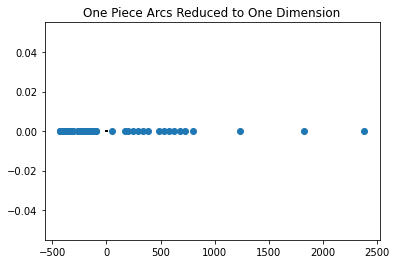

In [47]:
# Plotting one dimension PCA
plt.scatter(Y, np.zeros_like(Y))
plt.title('One Piece Arcs Reduced to One Dimension')
#plot line
plt.plot([0, 1], [0, 0], color='k', linestyle='-', linewidth=2)


# Exercício 3

Um grupo de estudos do meio ambiente no planeta de Kabum Prime possui um balão meteorológico que coleta diversos dados sobre a atmosfera.

Foi desenvolvido um novo sensor e os cientistas estão analisando se devem incorporar ele ao balão.

O sensor atual suporta uma temperatura de -50 graus Celsius.

O novo sensor suporta uma temperatura de -70 graus Celsius.

O grupo de estudos mediu a temperatura da atmosfera em diversos pontos e obteve os dados apresentados abaixo.

Utilizando o método de descida pelo gradiente com um modelo linear do tipo $y=ax+b$ responda: Qual a altura máxima aproximada que o balão pode atingir com o novo sensor?

y =  -3.03 x +  40.33


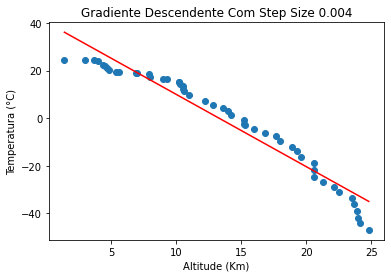

y =  -2.72 x +  35.08


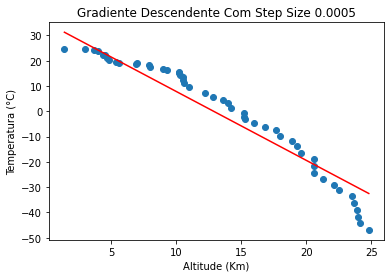

In [103]:
import matplotlib.pyplot as plt
import random
import autograd.numpy as np_
from autograd import grad

def loss( parametros ):
    a, b, x, y_medido = parametros
    yhat = a * x + b
    mse = np_.mean( (yhat - y_medido)**2 )
    return mse

g = grad(loss)

altura = np.array([1.4, 3.0, 3.7, 4.0, 4.4, 4.5, 4.7, 4.8, 5.4, 5.6, 6.9, 7.0, 7.9, 8.0, 9.0, 9.3, 10.2, 10.2, 10.3, 10.5, 10.5, 10.6, 11.0, 12.2, 12.8, 13.6, 14.0, 14.2, 15.2, 15.2, 15.3, 16.0, 16.8, 17.7, 18.0, 18.9, 19.3, 19.6, 20.6, 20.6, 20.6, 21.3, 22.1, 22.5, 23.5, 23.7, 23.9, 24.0, 24.1, 24.8])
temperatura = np.array([24.5, 24.5, 24.3, 24.0, 22.3, 22.1, 21.2, 20.1, 19.6, 19.3, 18.8, 19.0, 18.5, 17.4, 16.6, 16.4, 15.4, 15.1, 14.5, 13.7, 12.2, 11.3, 9.7, 7.2, 5.5, 4.3, 3.1, 1.5, -0.7, -2.3, -2.9, -4.6, -6.1, -7.5, -9.7, -11.9, -13.6, -16.5, -18.7, -21.8, -24.5, -26.9, -29.0, -31.1, -33.6, -36.2, -38.9, -41.8, -44.0, -46.9])

a1 = 0.0
b1 = 0.0

for i in range(10000):
    gradiente = g( (a1, b1, altura, temperatura) )
    a1 = a1 - 0.004 * gradiente[0]
    b1 = b1 - 0.004 * gradiente[1]
print("y = ", a1.round(2), "x + ", b1.round(2))
plt.figure()
plt.scatter(altura,temperatura)
plt.plot(altura, a1 * np.array(altura) + b1, color='red')
plt.xlabel('Altitude (Km)')
plt.ylabel('Temperatura (°C)')
plt.title('Gradiente Descendente Com Step Size 0.004')
plt.show()

a2 = 0.0
b2 = 0.0

for i in range(10000):
    gradiente = g( (a2, b2, altura, temperatura) )
    a2 = a2 - 0.0005 * gradiente[0]
    b2 = b2 - 0.0005 * gradiente[1]
print("y = ", a2.round(2), "x + ", b2.round(2))
plt.figure()
plt.scatter(altura,temperatura)
plt.plot(altura, a2 * np.array(altura) + b2, color='red')
plt.xlabel('Altitude (Km)')
plt.ylabel('Temperatura (°C)')
plt.title('Gradiente Descendente Com Step Size 0.0005')
plt.show()

In [105]:
erro_total_0_004 = 0.0
variancia_0_004 = 0.0
erro_total_0_0005 = 0.0
variancia_0_0005 = 0.0


for i in range(len(altura)):
    erro_total_0_004 += (temperatura[i] - (a1 * altura[i] + b1))**2
    erro_total_0_0005 += (temperatura[i] - (a2 * altura[i] + b2))**2
    variancia_0_004 += (temperatura[i] - np.mean(temperatura))**2
    variancia_0_0005 += (temperatura[i] - np.mean(temperatura))**2
print("Erro total com step size 0.004: ", erro_total_0_004.round(2))
print("Erro total com step size 0.0005: ", erro_total_0_0005.round(2))

print("R2 com step size 0.004: ", (1 - erro_total_0_004/variancia_0_004).round(2))
print("R2 com step size 0.0005: ", (1 - erro_total_0_0005/variancia_0_0005).round(2))


Erro total com step size 0.004:  1313.8
Erro total com step size 0.0005:  1595.74
R2 com step size 0.004:  0.94
R2 com step size 0.0005:  0.93


Dado que o erro cumulativo do modelo com o step maior (de 0.004) é menor, e o Rˆ2 é maior, podemos concluir que o modelo com step maior é melhor. Agora, calcularemos a altura máxima que o novo sensor pode atingir dado que a temperatura é -70 graus Celsius.

In [111]:
print("Chosen Function: ", "y = ", a1.round(2), "x + ", b1.round(2))
print("-70 = ", a1.round(2), "* x + ", b1.round(2))
print("x = ", (-70 - b1.round(2))/a1.round(2))

Chosen Function:  y =  -3.03 x +  40.33
-70 =  -3.03 * x +  40.33
x =  36.412541254125415


Utilizando o modelo $y=ax+b$, estimamos que a altitude máxima que o balão pode atingir com o novo sensor é de 36.4km.

# Exercício 4

1. Apresente a árvore de Huffman para a palavra `COELHO`.
1. Qual é a codificação da palavra `COELHO` na árvore apresentada?
1. Qual é o limite inferior para o número de bits que devem ser usados para representar essa palavra?

In [116]:
def huffman_tree(texto : str):
    """Monta a arvore de codificacao usando o algoritmo de huffman"""
    def get_prob(item):
        return item['prob']

    f = []

    # Calcula probabilidade de cada caractere      
    for c in set(texto):
        f.append(  {'prob':texto.count(c)/len(texto), 'valor':c} )
    f.sort(key=get_prob)
    
    while len(f) > 1:
        c1 = f.pop(0)
        c2 = f.pop(0)
        novo_node = {'valor':'NAO_FOLHA', 'prob':c1['prob']+c2['prob'], 'filho_0':c1, 'filho_1': c2}
        
        f.insert(0, novo_node)
        f.sort(key=get_prob)

    return f[0]

from pprint import pprint
pprint(huffman_tree("COELHO"))

{'filho_0': {'prob': 0.3333333333333333, 'valor': 'O'},
 'filho_1': {'filho_0': {'filho_0': {'prob': 0.16666666666666666, 'valor': 'E'},
                         'filho_1': {'prob': 0.16666666666666666, 'valor': 'L'},
                         'prob': 0.3333333333333333,
                         'valor': 'NAO_FOLHA'},
             'filho_1': {'filho_0': {'prob': 0.16666666666666666, 'valor': 'C'},
                         'filho_1': {'prob': 0.16666666666666666, 'valor': 'H'},
                         'prob': 0.3333333333333333,
                         'valor': 'NAO_FOLHA'},
             'prob': 0.6666666666666666,
             'valor': 'NAO_FOLHA'},
 'prob': 1.0,
 'valor': 'NAO_FOLHA'}


{'filho_0': {'filho_0': {'prob': 0.16666666666666666, 'valor': 'C'},
             'filho_1': {'prob': 0.16666666666666666, 'valor': 'A'},
             'prob': 0.3333333333333333,
             'valor': 'NAO_FOLHA'},
 'filho_1': {'filho_0': {'filho_0': {'prob': 0.16666666666666666, 'valor': 'O'},
                         'filho_1': {'prob': 0.16666666666666666, 'valor': 'I'},
                         'prob': 0.3333333333333333,
                         'valor': 'NAO_FOLHA'},
             'filho_1': {'filho_0': {'prob': 0.16666666666666666, 'valor': 'M'},
                         'filho_1': {'prob': 0.16666666666666666, 'valor': 'R'},
                         'prob': 0.3333333333333333,
                         'valor': 'NAO_FOLHA'},
             'prob': 0.6666666666666666,
             'valor': 'NAO_FOLHA'},
 'prob': 1.0,
 'valor': 'NAO_FOLHA'}


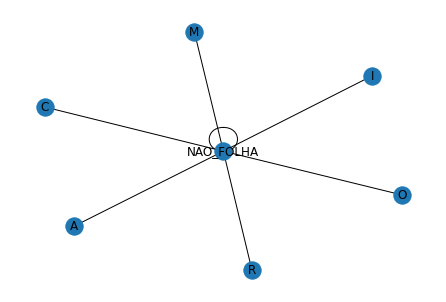

In [131]:
marcio_tree = huffman_tree("MARCIO")
pprint(marcio_tree)

# graph marcio tree

import networkx as nx
import matplotlib.pyplot as plt

def graph_marcio_tree(tree, graph, parent=None):
    if tree['valor'] == 'NAO_FOLHA':
        graph.add_node(tree['valor'], prob=tree['prob'])
        if parent is not None:
            graph.add_edge(parent, tree['valor'])
        graph_marcio_tree(tree['filho_0'], graph, tree['valor'])
        graph_marcio_tree(tree['filho_1'], graph, tree['valor'])
    else:
        graph.add_node(tree['valor'], prob=tree['prob'])
        if parent is not None:
            graph.add_edge(parent, tree['valor'])

G = nx.Graph()
graph_marcio_tree(marcio_tree, G)
nx.draw(G, with_labels=True)
plt.show()